In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
sbdarti = np.concatenate((np.array([.970,.970,.970,.970,.970,.970,.970,.970,.970,.970,.970,
      .971,.972,.973,.974,.975,.975,.975,.975,.976,.977,.978,
      .979,.980,.980,.980,.980,.980,.980,.980,.980,.981,.982,
      .983,.984,.985,.985,.985,.985,.986,.987,.988,.989,.990,
      .990,.990,.990,.990,.990,.990,.990,.990,.990,.990,.990,
      .988,.987,.986,.985,.983,.982,.981,.980,.978,.977,.976,
      .975,.973,.972,.971,.970,.968,.967,.966,.965,.965,.965,
      .965,.965,.963,.962,.961,.960,.953,.952,.951,.950,.950,
      .950,.950,.950,.948,.945,.943,.940,.938,.935,.933,.930,
      .928,.925,.923,.920,.918,.915,.913,.910,.908,.907,.906,
      .905,.903,.902,.901,.900,.898,.895,.893,.890,.885,.880,
      .875,.870,.865,.860,.855,.850,.843,.842,.841,.840,.835,
      .830,.825,.820,.810,.800,.790,.780,.771,.762,.753,.745,
      .739,.733,.727,.720,.718,.715,.713,.710,.715,.720,.725,
      .730,.733,.735,.738,.740,.742,.743,.744,.745,.745,.745,
      .745,.745,.743,.742,.741,.740,.732,.724,.716,.710,.692,
      .674,.656,.640,.630,.620,.610,.600,.584,.568,.552,.535,
      .524,.513,.502,.490,.490,.490,.490,.490,.490,.490,.490,
      .490,.492,.493,.494,.495,.495,.495,.495,.495,.495,.495,
      .495,.495,.493,.492,.491,.490,.488,.485,.483,.480,.470,
      .460,.450,.440,.424,.408,.392,.375,.320,.264,.198,.150,
      .134,.118,.101,.085,.074,.063,.051,.040,.036,.032,.028,
      .025,.025,.025,.025,.025,.028,.030,.033,.035,.039,.043,
      .047,.050,.053,.055,.058,.060,.063,.065,.068,.070,.073,
      .075,.078,.080,.083,.085,.088,.090,.093,.095,.098,.100,
      .104,.108,.112,.115,.119,.123,.126,.130,.135,.140,.145,
      .150,.153,.155,.158,.160,.163,.165,.168,.170,.173,.175,
      .178,.180,.184,.188,.192,.195,.204,.213,.222,.230,.238,
      .246,.254,.260,.254,.248,.242,.235,.206,.177,.148,.120,
      .104,.088,.072,.055,.049,.043,.037,.030,.038,.035,.033,
      .030,.028,.025,.023,.020,.023,.022,.021,.020,.018,.017,
      .016,.015,.013,.012,.011,.010,.010,.010,.010,.010,.010,
      .010,.010,.010,.012,.013,.014,.015,.017,.018,.019,.020,
      .022,.023,.024,.025,.025,.025,.025,.025,.027,.030,.032,
      .035,.040,.045,.050,.055,.059,.063,.067,.070,.074,.078,
      .082,.085,.089,.093,.097,.100,.102,.103,.104,.105,.109,
      .113,.117,.120,.124,.128,.132,.135,.130,.125,.120,.115,
      .108,.100,.092,.085,.081,.077,.073,.070,.068,.065,.063,
      .062,.058,.055,.053,.050,.048,.047,.046,.045,.042,.040,
      .038,.035,.033,.032,.031,.030,.030,.030,.030,.030,.028,
      .027,.026,.025,.025,.025,.025,.025,.025,.025,.025,.025,
      .025,.025,.025,.025,.025,.025,.025,.025,.025,.025,.025,
      .025,.025,.025,.025,.025,.023,.022,.021,.020,.018,.017,
      .016,.015,.013,.012,.011,.010,.008,.007,.006,.005,.003,
      .002,.001,.000]),np.zeros(264)))
wlalb2 = np.zeros(len(sbdarti))
for n in range(0,len(wlalb2)):
    wlalb2[n] = 0.25 + (4.0-0.25)*float(n)/(len(wlalb2)-1)

In [3]:
wlalb2[np.argwhere(sbdarti>0)[-1][0]]

2.675

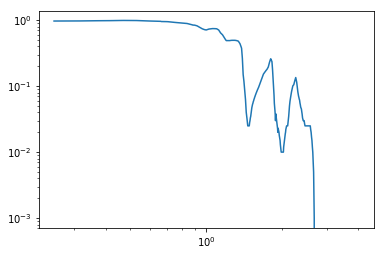

In [4]:
plt.plot(wlalb2,sbdarti)
plt.xscale('log')
plt.yscale('log')

In [5]:
manifest = {}
with open("manifest.txt","r") as mn:
    lines = mn.read().split('\n')
    for l in lines:
        lfile = l.split()
        if len(lfile)>0:
            manifest[lfile[0]] = lfile[1]

In [6]:
names = sorted(manifest.keys())
ix = 0
for n in names:
    print ix,n
    ix+=1

0 andesitefine
1 andesitesolid
2 basaltsolid
3 brownsand
4 clearice
5 coarsesnow
6 dunesand
7 finesnow
8 frost
9 mediumsnow
10 seafoam
11 seawater
12 tapwater
13 yellowloam
14 yellowsand


In [101]:
ids = [4,5,7,8,9,12]

In [102]:
for i in ids:
    print names[i]

clearice
coarsesnow
finesnow
frost
mediumsnow
tapwater


In [103]:
iceweight=0.175
weights = np.array([iceweight,0.2*(1-2*iceweight),0.2*(1-2*iceweight),0.2*(1-2*iceweight),0.4*(1-2*iceweight),iceweight])
#weights[0] = 1.75*weights[0]
#weights[-1] = 1.75*weights[-1]
#weights[1:-1] -= (weights[0]+weights[-1])/1.75*0.75/len(weights[1:-1])

In [104]:
print np.sum(weights),weights

1.0 [0.175 0.13  0.13  0.13  0.26  0.175]


In [105]:
wvref = np.loadtxt("wvref.txt")

In [106]:
print wvref.shape

(965,)


In [107]:
specs = np.zeros((len(ids),wvref.shape[0]))


In [108]:
for idn in range(len(ids)):
    filename = manifest[names[ids[idn]]]
    with open(filename,"r") as fileobj:
        text = fileobj.read().split('\n')
        for k in range(len(text)):
            if text[k].split()[0]=="Additional":
                nhead = k+2
                break
    spec = np.loadtxt(filename,skiprows=nhead,ndmin=2).transpose()
    if spec[0,0] > spec[0,-1]:
        spec = np.flip(spec,axis=1)
    specs[idn,:] = np.interp(wvref,spec[0,:],spec[1,:])

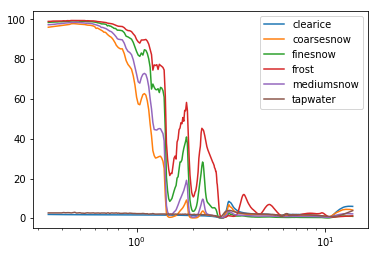

In [109]:
for idn in range(len(ids)):
    plt.plot(wvref,specs[idn,:],label=names[ids[idn]])
plt.xscale('log')
plt.legend()

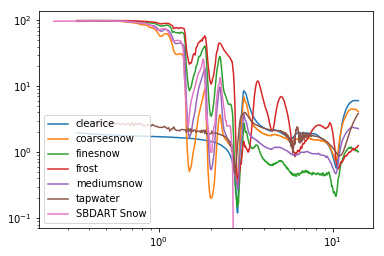

In [110]:
for idn in range(len(ids)):
    plt.plot(wvref,specs[idn,:],label=names[ids[idn]])
plt.plot(wlalb2,sbdarti*100,label="SBDART Snow")
plt.xscale('log')
plt.yscale('log')
plt.legend()

In [111]:
wtspec = np.copy(specs)
for n in range(len(ids)):
    wtspec[n,:] *= weights[n]

In [112]:
netspec = np.sum(wtspec,axis=0)

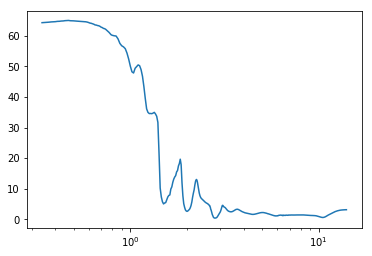

In [113]:
plt.plot(wvref,netspec)
plt.xscale('log')

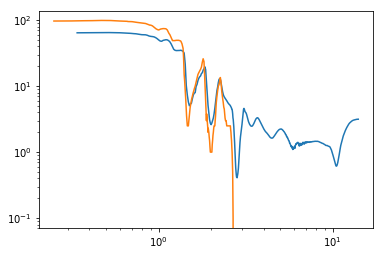

In [114]:
plt.plot(wvref,netspec)
plt.plot(wlalb2,sbdarti*100)
plt.xscale('log')
plt.yscale('log')

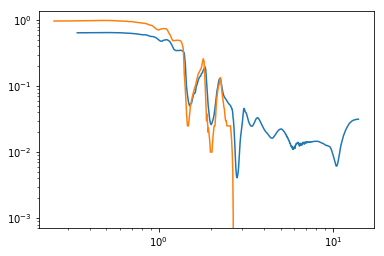

In [115]:
plt.plot(wvref,netspec*0.01)
plt.plot(wlalb2,sbdarti)
plt.xscale('log')
plt.yscale('log')

(0.34, 14.01)

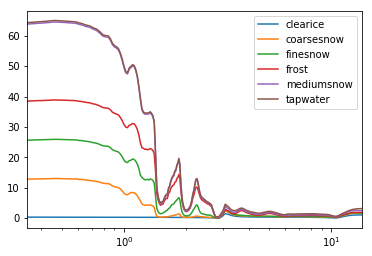

In [116]:
for n in range(len(ids)):
    plt.plot(wvref,np.sum(wtspec[:n+1,:],axis=0),label=names[ids[n]])
plt.xscale('log')
plt.legend()
plt.xlim(wvref.min(),wvref.max())

In [117]:
import colormatch as cm

In [118]:
print np.sum(weights)

1.0


In [119]:
def bbtemp(teff,wvref):
    sbk = 5.67e-8
    const = 0.0143877735383
    bbf = 1.0/wvref**5 * (1.0/(np.exp(const/(teff*wvref*1e-6))-1))
    return bbf

In [120]:
rgbs = []
srgbs = []
albs = []
stemps = np.linspace(2800,7900,num=18)
print stemps
bbs = []
for s in range(0,len(stemps)):
    bbf = bbtemp(stemps[s],wvref)
    bbs.append(bbtemp(stemps[s]-650.0,wvref))
    refl = netspec*0.01*bbf
    albb = np.trapz(refl[:145],x=wvref[:145])/np.trapz(bbf[:145],x=wvref[:145])
    albs.append(albb)
    #srgbs.append(cm.specs2rgb(wvref*1e3,[bbf,]))
    rgbs.append(cm.spec2rgb(wvref*1e3,refl,normalization=albb))
srgbs = cm.specs2rgb(wvref*1e3,np.array(bbs))

[2800. 3100. 3400. 3700. 4000. 4300. 4600. 4900. 5200. 5500. 5800. 6100.
 6400. 6700. 7000. 7300. 7600. 7900.]


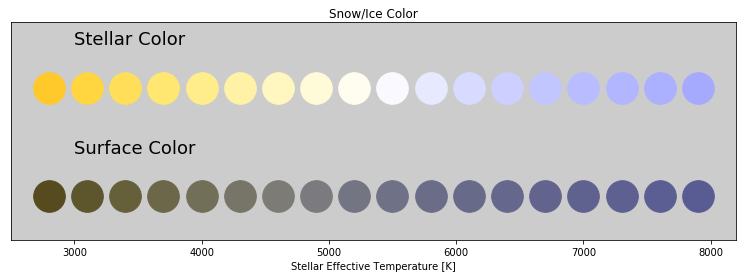

In [121]:
fig,ax=plt.subplots(figsize=(13,4))
for s in range(len(stemps)):
    plt.scatter(stemps[s],1.0,marker='o',color=np.array(rgbs[s])/np.amax(rgbs[s])*albs[s],s=1000)
    plt.scatter(stemps[s],1.25,marker='o',color=np.array(srgbs[s])/np.amax(srgbs[s]),s=1000)
    #plt.annotate("%d K"%stemps[s],(stemps[s]-100,1.35))
    #print stemps[s]
    #plt.axvline(stemps[s])
ax.set_facecolor('0.8')
plt.annotate("Stellar Color",(3000,1.35),color='k',fontsize=18)
plt.annotate("Surface Color",(3000,1.1),color='k',fontsize=18)
plt.ylim(0.9,1.4)
plt.xlim(2500,8200)
plt.tick_params(
    axis='y',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    left=False,      # ticks along the bottom edge are off
    right=False,         # ticks along the top edge are off
    labelleft=False)
plt.xlabel("Stellar Effective Temperature [K]")
plt.title("Snow/Ice Color")
plt.savefig("colorgrid_snow.png",bbox_inches='tight')

In [122]:
alb1 = np.zeros(100)
alb2 = np.zeros(100)
albb = np.zeros(100)
teffs = np.linspace(2700,6000,num=100)

In [123]:
for n in range(100):
    bbf = bbtemp(teffs[n],wvref)
    refl = netspec*0.01*bbf
    alb1[n] = np.trapz(refl[:42],x=wvref[:42])/np.trapz(bbf[:42],x=wvref[:42])
    alb2[n] = np.trapz(refl[42:145],x=wvref[42:145])/np.trapz(bbf[42:145],x=wvref[42:145])
    albb[n] = np.trapz(refl[:145],x=wvref[:145])/np.trapz(bbf[:145],x=wvref[:145])

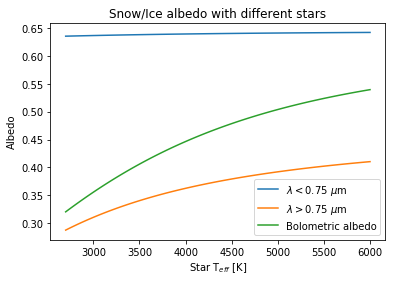

In [124]:
plt.plot(teffs,alb1,label="$\lambda<{0.75}$ $\mu$m")
plt.plot(teffs,alb2,label="$\lambda>{0.75}$ $\mu$m")
plt.plot(teffs,albb,label='Bolometric albedo')
plt.legend(loc='best')
plt.xlabel("Star T$_{eff}$ [K]")
plt.ylabel("Albedo")
plt.title("Snow/Ice albedo with different stars")
plt.savefig("snow_bolometric.png",bbox_inches='tight')

In [125]:
print teffs[-16],albb[-7]

5500.0 0.5339971807811563


In [126]:

low = 0.0
high = 0.7
nsteps = 50
target = 0.6
for n in range(nsteps):
    mid = 0.5*(low+high)
    iceweight=mid
    weights = np.array([iceweight,0.2*(1-2*iceweight),0.2*(1-2*iceweight),0.2*(1-2*iceweight),0.4*(1-2*iceweight),iceweight])
    wtspec = np.copy(specs)
    for n in range(len(ids)):
        wtspec[n,:] *= weights[n]
    netspec = np.sum(wtspec,axis=0)
    bb0 = bbtemp(5772.0,wvref)
    refl = netspec*0.01*bb0
    alb10 = np.trapz(refl[:42],x=wvref[:42])/np.trapz(bb0[:42],x=wvref[:42])
    alb20 = np.trapz(refl[42:145],x=wvref[42:145])/np.trapz(bb0[42:145],x=wvref[42:145])
    albb0 = np.trapz(refl[:145],x=wvref[:145])/np.trapz(bb0[:145],x=wvref[:145])
    if albb0>target: #Not enough water; increase
        low=mid
        high=high
    else: #Too much water; reduce
        high=mid
        low=low
    print mid,albb0

0.35 0.25761237220096017
0.175 0.5331306611703533
0.0875 0.67088980565505
0.13125 0.6020102334127018
0.153125 0.5675704472915275
0.1421875 0.5847903403521147
0.13671875 0.5934002868824081
0.133984375 0.597705260147555
0.1326171875 0.5998577467801285
0.13193359375 0.600933990096415
0.132275390625 0.6003958684382715
0.132446289062 0.6001268076092
0.132531738281 0.5999922771946642
0.132489013672 0.600059542401932
0.132510375977 0.6000259097982983
0.132521057129 0.6000090934964812
0.132526397705 0.6000006853455726
0.132529067993 0.5999964812701184
0.132527732849 0.5999985833078455
0.132527065277 0.5999996343267091
0.132526731491 0.6000001598361409
0.132526898384 0.599999897081425
0.132526814938 0.600000028458783
0.132526856661 0.5999999627701039
0.132526835799 0.5999999956144434
0.132526825368 0.6000000120366131
0.132526830584 0.6000000038255284
0.132526833192 0.5999999997199859
0.132526831888 0.6000000017727571
0.13252683254 0.6000000007463715
0.132526832866 0.6000000002331787
0.132526833

In [127]:
specvar = "glacalbmin"
specinttext = ""
for n in range(len(ids)):
    specinttext+="%s:\t%f\n"%(names[ids[n]],weights[n])
specinttext += "       real :: %s(%d) = (/"%(specvar,len(wvref))
specinttext += ",".join(["%.4f" % number for number in netspec[0:8]]) + ", &\n"
n=8
while n+8<len(wvref):
    specinttext += "      &          " + ",".join(["%.4f" % number for number in netspec[n:n+8]]) + ", &\n"
    n+=8
specinttext += "      &          " + ",".join(["%.4f" % number for number in netspec[n:]]) + " /)"

In [128]:
newfilename = specvar+"_interp_f90.txt"
with open(newfilename,"w") as fileobj:
    fileobj.write(specinttext+'\n')

In [129]:
print specinttext

clearice:	0.132527
coarsesnow:	0.146989
finesnow:	0.146989
frost:	0.146989
mediumsnow:	0.293979
tapwater:	0.132527
       real :: glacalbmin(965) = (/72.4169,72.4757,72.5526,72.6059,72.6988,72.7347,72.7905,72.8930, &
      &          72.9273,73.0186,73.0539,73.1645,73.2047,73.2290,73.1495,73.1409, &
      &          73.0941,73.0347,73.0064,72.9693,72.8926,72.8997,72.8623,72.8067, &
      &          72.7540,72.6495,72.5001,72.2900,72.2027,72.0435,71.8706,71.5977, &
      &          71.5407,71.3689,71.2913,71.0888,70.7633,70.6048,70.3276,70.2190, &
      &          69.9691,69.6246,69.2366,68.8814,68.4452,67.9915,67.7922,67.6064, &
      &          67.5216,66.4629,64.7761,63.9120,63.4919,62.8273,61.1861,58.9695, &
      &          56.3467,54.2857,53.8507,55.5906,56.2426,56.8445,56.5488,55.0883, &
      &          52.6528,48.8252,44.4643,40.6012,39.3124,38.8697,38.8985,38.8361, &
      &          39.0371,39.3135,38.7137,37.8557,35.5965,24.0715,11.3122,8.0485, &
      &          6.2698,5.46